# Project: Investigate TMDB 5000 Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Intro**: In this notebook I will be studying TMDB 5000 Movie dataset to understand the different factors that effect the profit of the inductry over years.<a id='intro'></a>

In [1]:
#used packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#magic word
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#colmun names  and data types of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# over view over the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
#df columns names
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### Data Cleaning

In [6]:
#will drop colums that i will not use like   id/imbd_id / homepage / tagline / keywords / over view
df.drop(['id','imdb_id', 'homepage', 'keywords', 'tagline','overview'], axis=1, inplace=True)

In [7]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
#num of duplicated rows
df.duplicated().sum()

1

In [9]:
#drop duplicated
df.drop_duplicates(inplace=True)

In [10]:
#num of nans in each column
df.isna().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

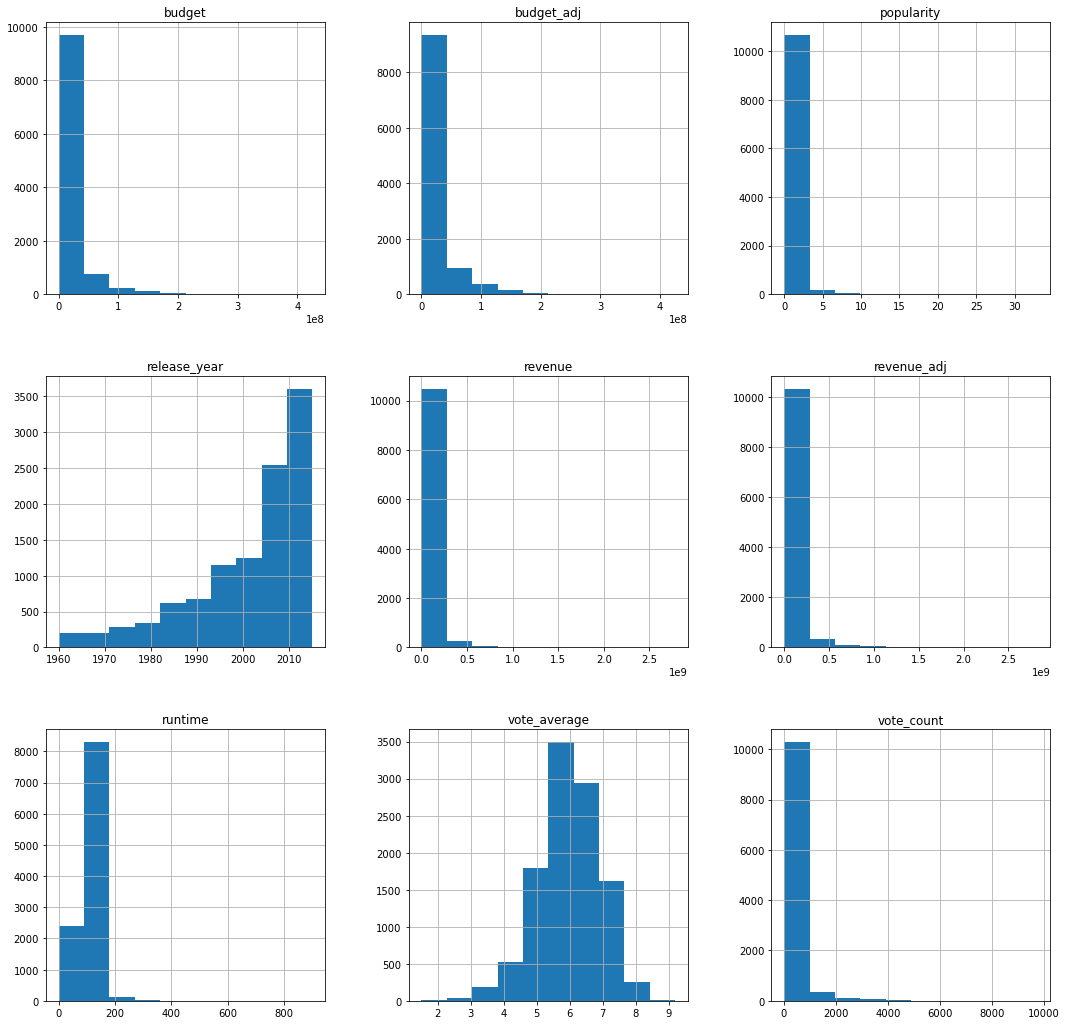

In [11]:
df.hist(figsize = (18,18));

In [12]:
(num,col)=df[df['budget']==0].shape
print("number of movies with zero budget = ",num)

number of movies with zero budget =  5696


In [13]:
(num,col) = df[df['revenue']==0].shape
print("number of movies with zero revenue = ",num)

number of movies with zero revenue =  6016


In [14]:
#drop buget = zero
df.drop(df.loc[df['budget']==0].index, inplace=True)

In [15]:
(num,col)=df[df['budget']==0].shape
print("number of movies with zero budget = ",num)

number of movies with zero budget =  0


In [16]:
#drop revenue = zero
df.drop(df.loc[df['revenue']==0].index, inplace=True)

In [17]:
(num,col)=df[df['revenue']==0].shape
print("number of movies with zero revenue = ",num)

number of movies with zero revenue =  0


In [18]:
# add profit column
df["profit"] = df["revenue"] - df["budget"]

In [19]:
# check after edit
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3854 non-null   float64
 1   budget                3854 non-null   int64  
 2   revenue               3854 non-null   int64  
 3   original_title        3854 non-null   object 
 4   cast                  3850 non-null   object 
 5   director              3853 non-null   object 
 6   runtime               3854 non-null   int64  
 7   genres                3854 non-null   object 
 8   production_companies  3808 non-null   object 
 9   release_date          3854 non-null   object 
 10  vote_count            3854 non-null   int64  
 11  vote_average          3854 non-null   float64
 12  release_year          3854 non-null   int64  
 13  budget_adj            3854 non-null   float64
 14  revenue_adj           3854 non-null   float64
 15  profit              

In [21]:
#check number of nan after removing zero values
df.isna().sum()

popularity               0
budget                   0
revenue                  0
original_title           0
cast                     4
director                 1
runtime                  0
genres                   0
production_companies    46
release_date             0
vote_count               0
vote_average             0
release_year             0
budget_adj               0
revenue_adj              0
profit                   0
dtype: int64

In [22]:
#check years
df["release_year"].unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

In [23]:
df["director"].unique().shape

(1714,)

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1 (does the industry grows? (year profit relation)!)

In [24]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
features = ["release_year", "profit"]
df_growth = df.loc[:,features]

In [25]:
#selected  features 
df_growth.head()

,release_year,profit
0,2015,1363528810
1,2015,228436354
2,2015,185238201
3,2015,1868178225
4,2015,1316249360


In [26]:
#mean version 
df_growth_mean = df_growth.groupby(['release_year']).mean()
df_growth_mean.head(10)

,profit
release_year,
1960,2.163961e+07
1961,2.990832e+07
1962,2.383998e+07
1963,1.923531e+07
1964,4.209691e+07
1965,7.985637e+07
1966,1.049374e+07
1967,4.894882e+07
1968,1.869686e+07


In [27]:
# total version
df_growth_sum = df_growth.groupby(['release_year']).sum()
df_growth_sum.head(10)

,profit
release_year,
1960,108198052
1961,299083188
1962,166879846
1963,115411882
1964,294678387
1965,399281854
1966,52468689
1967,636334637
1968,168271762


In [28]:
df_growth_mean.sort_values(by = "profit",ascending=False, inplace=True)
graph_df_growth_mean = df_growth_mean.head(10)

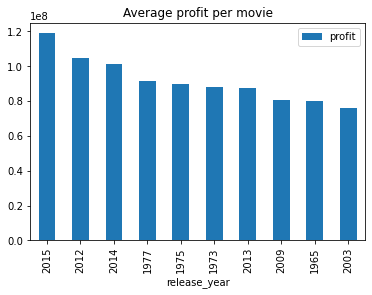

In [29]:
graph_df_growth_mean.plot(y='profit', use_index=True, kind = "bar",title='Average profit per movie');

In [30]:
df_growth_sum.sort_values(by = "profit",ascending=False, inplace=True)
graph_df_growth_sum = df_growth_sum.head(10)

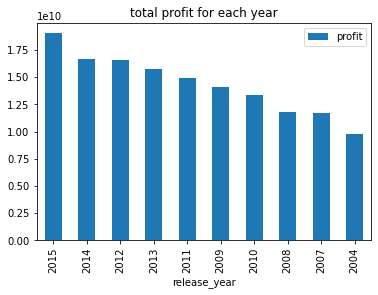

In [31]:
graph_df_growth_sum.plot(y='profit', use_index=True, kind = "bar",title='total profit for each year');

over all yes it increases but in some years (masterpieces) this relation does not holds

### Research Question 2  (Best directors when comes to profit)

In [32]:
features = ["director", "profit"]
#drop nan as there were some nan values in directory
df_no_nan = df.dropna()
df_director = df_no_nan.loc[:,features]

In [33]:
df_director.head()

,director,profit
0,Colin Trevorrow,1363528810
1,George Miller,228436354
2,Robert Schwentke,185238201
3,J.J. Abrams,1868178225
4,James Wan,1316249360


In [34]:
df_director_mean = df_director.groupby(['director']).mean()
df_director_mean.head(10)

,profit
director,
FrÃ©dÃ©ric Jardin,-2.496642e+06
Aaron Blaise|Robert Walker,-9.999975e+07
Aaron Seltzer|Jason Friedberg,2.854843e+07
Abbas Tyrewala,8.800000e+06
Abe Sylvia,-3.944875e+06
Abel Ferrara,-3.332396e+06
Adam Green,-2.447396e+06
Adam Marcus,-2.999985e+06
Adam McKay,8.626274e+07


In [35]:
df_director_sum = df_director.groupby(['director']).sum()
df_director_sum.head(10)

,profit
director,
FrÃ©dÃ©ric Jardin,-2496642
Aaron Blaise|Robert Walker,-99999750
Aaron Seltzer|Jason Friedberg,28548426
Abbas Tyrewala,8800000
Abe Sylvia,-3944875
Abel Ferrara,-9997187
Adam Green,-2447396
Adam Marcus,-2999985
Adam McKay,517576455


In [36]:
df_director_mean.sort_values(by = "profit",ascending=False, inplace=True)
graph_df_director_mean = df_director_mean.head(10)

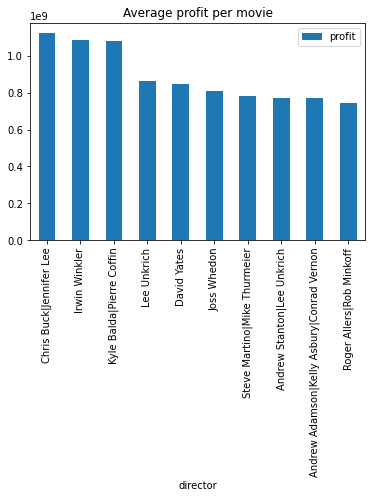

In [37]:
graph_df_director_mean.plot(y='profit', use_index=True, kind = "bar",title='Average profit per movie');

In [38]:
df_director_sum.sort_values(by = "profit",ascending=False, inplace=True)
graph_df_director_sum = df_director_sum.head(10)

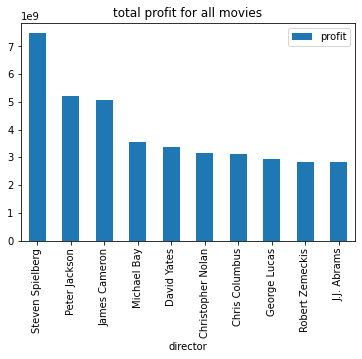

In [39]:
graph_df_director_sum.plot(y='profit', use_index=True, kind = "bar",title='total profit for all movies');

In [40]:
df_director["director"].value_counts().head(10)

Steven Spielberg     27
Clint Eastwood       24
Ridley Scott         21
Woody Allen          18
Steven Soderbergh    17
Martin Scorsese      17
Tim Burton           16
Oliver Stone         15
Robert Zemeckis      15
Renny Harlin         15
Name: director, dtype: int64

### Research Question 3  (does alway paying more = getting more profit?)

In [41]:
features = ["budget", "profit"]
df_relation = df.loc[:,features]

In [42]:
df_relation.head()

,budget,profit
0,150000000,1363528810
1,150000000,228436354
2,110000000,185238201
3,200000000,1868178225
4,190000000,1316249360


In [44]:
x = df_relation["budget"]
y = df_relation["profit"]
m, b = np.polyfit(x, y, 1)

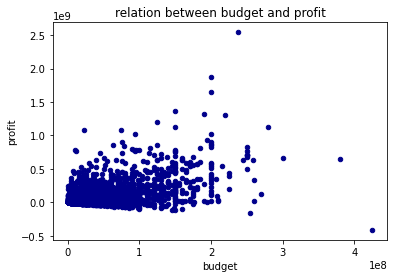

In [45]:
df_relation.plot.scatter(x='budget' , y='profit', c='DarkBlue',title = "relation between budget and profit");

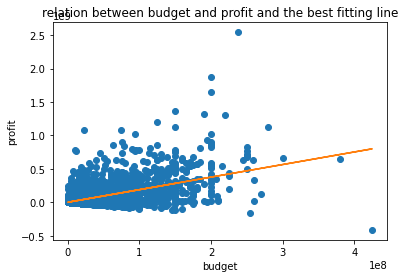

In [46]:
plt.title('relation between budget and profit and the best fitting line')
plt.xlabel('budget')
plt.ylabel('profit')
plt.plot(x, y, 'o');
plt.plot(x, m*x + b);


I used this link to help me with the plot above
https://www.kite.com/python/answers/how-to-plot-a-line-of-best-fit-in-python

### positive correlation


<a id='conclusions'></a>
## Conclusions

> **1**: The inductry grows over time 

> **2**: paying more does not necesserly equal more profit however both features are positivey corroleted

> **3**: for the directory question could not find a clear answer to the question does profit depents on director how ever it is noticable that the most frequent name is the top in total profit and the secound is not so it in deed depends on the dirctor

## Limitation
> for me ,I set the main goal of my anaylises to study factors that effects the profit of the inductry. however there were some factors that effects my final conclusion includes :

> **1**: the combined format of the genere ( I really wished to fined the best combined genere to reward relation)

> **2**: the wrong values of budget and revenue (zero)

> **3**: the number of nans in the data set

